In [2]:
from tqdm.notebook import trange

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('whitegrid')

import numpy as np

import jax.numpy as jnp

from tensorflow_probability.substrates.jax.distributions import Triangular, Uniform 

from greedy_poisson_rejection_sampling.triangular import kld_triangular_uniform
from greedy_poisson_rejection_sampling.triangular import infd_triangular_uniform
from greedy_poisson_rejection_sampling.triangular import triangular_uniform_encode_example
from greedy_poisson_rejection_sampling.triangular import triangular_uniform_decode

%matplotlib inline

%load_ext autoreload
%autoreload 2

# Triangular-Uniform Case

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


kl2=Array(1.6005806, dtype=float32)
infd2=Array(2.321928, dtype=float32)


  0%|          | 0/100 [00:00<?, ?it/s]

Average number of steps: 4.960000038146973
Expected number of steps: 4.999999523162842


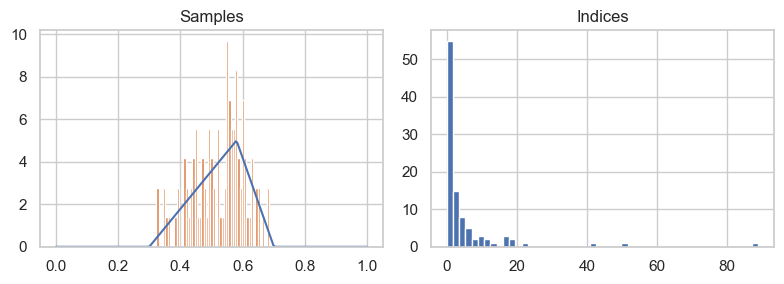

In [3]:
low = 0.3
high = 0.7
peak = 0.3 * low + 0.7 * high

N = 100

q = Triangular(low, high, peak)
p = Uniform()

kl2 = kld_triangular_uniform(q, p) / jnp.log(2.)
infd2 = infd_triangular_uniform(q, p) / jnp.log(2.)

print(f"{kl2=}")
print(f"{infd2=}")

samps = []
inds = []

for i in trange(N):
  samp, ind = triangular_uniform_encode_example(i, p, q)

  decoded_samp = triangular_uniform_decode(i, ind, p)

  assert jnp.all(samp == decoded_samp)

  samps.append(samp)
  inds.append(ind)

samps = jnp.array(samps)
inds = jnp.array(inds)

print(f"Average number of steps: {inds.mean()}")
print(f"Expected number of steps: {jnp.exp2(infd2)}")

xss = jnp.linspace(0., 1., 200)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].plot(xss, q.prob(xss))
axes[0].hist(np.asarray(samps), bins=50, density=True)
axes[0].set_title("Samples")

axes[1].hist(np.asarray(inds), bins=50)
axes[1].set_title("Indices")

fig.tight_layout()

plt.show()